In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Stijn de Boer (s1003731), 
Ron Hommelsheim (s1003731),
David Leeftink (s4496612).

### Exercise 4: Role of selection in GA’ s

In [2]:
def binary_GA(l=100, n_iter=1500):
    """
    (1+1) GA for solving the Counting Ones problem. 
    
    :param l (int): length of the bit string
    :param n_iter (int): number of iterations of the algorithm    
    
    :return x (NumPy array) bit string with maximum sum of elements
    :return F (n_iter x 3)
    :return max_score_reached (Bool) True if l ones are present in final string
    """
    # random initial bit sequence 
    x   = np.random.randint(2, size=l)
    mutation_rate = 1/l
    F = np.zeros(n_iter) # fitness
    
    for i in range(n_iter):
        # Invert x_m at each bit with p = 1/l    
        invert_idx = np.random.binomial(size=l, n=1, p=mutation_rate) # bernoulli trial for each gene with p=1/l
        x_m        = np.abs(x-invert_idx)
        
        # Compute fitness, keep best solution
        f_x, f_xm = np.sum(x), np.sum(x_m)
        F[i] = np.maximum(f_x, f_xm)

        if f_xm > f_x: 
            x = x_m
            
    converged = np.sum(x)==l
    return x, F, converged

def plot_convergence(F, l, filepath=None):
    n_iter = F.shape[0]
    plt.figure(figsize=(8,5))    
    plt.plot(np.arange(n_iter), F, label='best')
    plt.axhline(y=l, linestyle=':', color='black', label='maximum score')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Convergence of (1+1) GA on Counting Ones problem')
    plt.legend()
    if filepath is not None:
        plt.savefig(filepath)
    plt.show()

converged: True


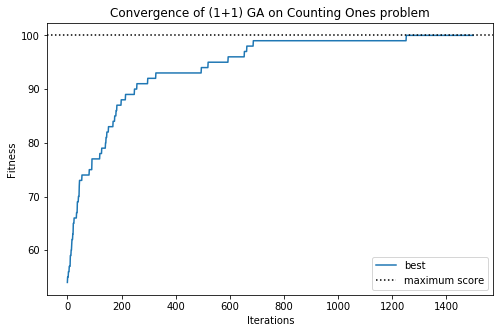

In [3]:
l, n_iter = 100, 1500
x, F, converged = binary_GA(l=l, n_iter=n_iter)
print(f'converged: {converged}')
plot_convergence(F, l)#, filepath='A1_4a_GA.pdf')

In [4]:
# 10 runs
l, n_iter = 100, 1500
n_trials, n_converged = 10, 0

for i in range(n_trials):
    x, F, converged = binary_GA(l=l, n_iter=n_iter)
    if converged:
        n_converged += 1

print(f'{n_converged}/{n_trials}')       
# 100 runs
l, n_iter = 100, 1500
n_trials, n_converged = 100, 0

for i in range(n_trials):
    x, F, converged = binary_GA(l=l, n_iter=n_iter)
    if converged:
        n_converged += 1

print(f'{n_converged}/{n_trials}')  

9/10
92/100


  ### c. Always replace $x$ with $x_m$

In [5]:
def binary_GA_altered(l=100, n_iter=1500):
    """
    (1+1) GA for solving the Counting Ones problem.
    always accepts the next generation.
    
    :param l (int): length of the bit string
    :param n_iter (int): number of iterations of the algorithm    
    
    :return x (NumPy array) bit string with maximum sum of elements
    :return F (n_iter x 3)
    :return max_score_reached (Bool) True if l ones are present in final string
    """
    # random initial bit sequence 
    x   = np.random.randint(2, size=l)
    mutation_rate = 1/l
    F = np.zeros(n_iter) # fitness
    
    for i in range(n_iter):
        # Invert x_m at each bit with p = 1/l    
        invert_idx = np.random.binomial(size=l, n=1, p=mutation_rate) # bernoulli trial for each gene with p=1/l
        x_m        = np.abs(x-invert_idx)
        
        # Compute fitness, keep best solution
        f_x, f_xm = np.sum(x), np.sum(x_m)
        F[i] = np.maximum(f_x, f_xm)
        x = x_m
        
            
    converged = np.sum(x)==l
    return x, F, converged

converged: False


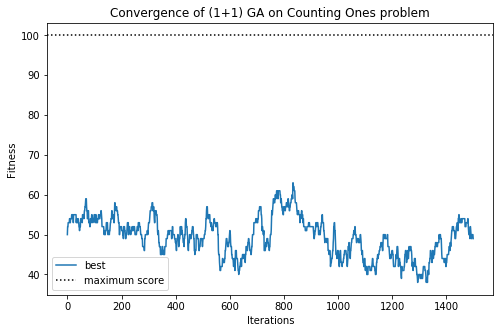

0/10
0/100


In [6]:
# 1 run
l, n_iter = 100, 1500
x, F, converged = binary_GA_altered(l=l, n_iter=n_iter)
print(f'converged: {converged}')
plot_convergence(F, l, filepath='A1_4c.pdf')

# 10 runs
l, n_iter = 100, 1500
n_trials, n_converged = 10, 0

for i in range(n_trials):
    x, F, converged = binary_GA_altered(l=l, n_iter=n_iter)
    if converged:
        n_converged += 1

print(f'{n_converged}/{n_trials}')       
# 100 runs
l, n_iter = 10, 1500
n_trials, n_converged = 100, 0

for i in range(n_trials):
    x, F, converged = binary_GA_altered(l=l, n_iter=n_iter)
    if converged:
        n_converged += 1

print(f'{n_converged}/{n_trials}')  

### Exercise 6: Memetic algorithm for the TSP